# ニューラルネット
## 第6章で取り組んだニュース記事のカテゴリ分類を題材として，ニューラルネットワークでカテゴリ分類モデルを実装する．なお，この章ではPyTorch, TensorFlow, Chainerなどの機械学習プラットフォームを活用せよ．



####https://nlp100.github.io/ja/ch08.html

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/iamtatsuki05/NLP_100/blob/fix_all_merge/NLP_100_8.ipynb)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
!pip3 install -U polars

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 21.6 MB/s eta 0:00:00
  Attempting uninstall: polars
    Found existing installation: polars 0.17.3
    Uninstalling polars-0.17.3:
      Successfully uninstalled polars-0.17.3


# 単語ベクトルの和による特徴量
## 問題50で構築した学習データ，検証データ，評価データを行列・ベクトルに変換したい．例えば，学習データについて，すべての事例xiの特徴ベクトルxiを並べた行列Xと，正解ラベルを並べた行列（ベクトル）Yを作成したい．

X=⎛⎝⎜⎜⎜⎜x1x2…xn⎞⎠⎟⎟⎟⎟∈ℝn×d,Y=⎛⎝⎜⎜⎜⎜y1y2…yn⎞⎠⎟⎟⎟⎟∈ℕn
ここで，nは学習データの事例数であり，xi∈ℝdとyi∈ℕはそれぞれ，i∈{1,…,n}番目の事例の特徴量ベクトルと正解ラベルを表す． なお，今回は「ビジネス」「科学技術」「エンターテイメント」「健康」の4カテゴリ分類である．ℕ<4で4未満の自然数（0を含む）を表すことにすれば，任意の事例の正解ラベルyiはyi∈ℕ<4で表現できる． 以降では，ラベルの種類数をLで表す（今回の分類タスクではL=4である）．

i番目の事例の特徴ベクトルxiは，次式で求める．

xi=1Ti∑t=1Tiemb(wi,t)
ここで，i番目の事例はTi個の（記事見出しの）単語列(wi,1,wi,2,…,wi,Ti)から構成され，emb(w)∈ℝdは単語wに対応する単語ベクトル（次元数はd）である．すなわち，i番目の事例の記事見出しを，その見出しに含まれる単語のベクトルの平均で表現したものがxiである．今回は単語ベクトルとして，問題60でダウンロードしたものを用いればよい．300次元の単語ベクトルを用いたので，d=300である．

i番目の事例のラベルyiは，次のように定義する．

yi=⎧⎩⎨⎪⎪0123(記事xiが「ビジネス」カテゴリの場合)(記事xiが「科学技術」カテゴリの場合)(記事xiが「エンターテイメント」カテゴリの場合)(記事xiが「健康」カテゴリの場合)
なお，カテゴリ名とラベルの番号が一対一で対応付いていれば，上式の通りの対応付けでなくてもよい．

以上の仕様に基づき，以下の行列・ベクトルを作成し，ファイルに保存せよ．

学習データの特徴量行列: Xtrain∈ℝNt×d
学習データのラベルベクトル: Ytrain∈ℕNt
検証データの特徴量行列: Xvalid∈ℝNv×d
検証データのラベルベクトル: Yvalid∈ℕNv
評価データの特徴量行列: Xtest∈ℝNe×d
評価データのラベルベクトル: Ytest∈ℕNe
なお，Nt,Nv,Neはそれぞれ，学習データの事例数，検証データの事例数，評価データの事例数である．

In [2]:
# 学習データの特徴量行列: Xtrain
# 学習データのラベルベクトル: Ytrain
# 検証データの特徴量行列: Xvalid
# 検証データのラベルベクトル: Yvalid
# 評価データの特徴量行列: Xtest
# 評価データのラベルベクトル: Ytest
# Nt,Nv,Ne はそれぞれ，学習データの事例数，検証データの事例数，評価データの事例数．

# 問題50のデータをもう一度作成します。
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00359/NewsAggregatorDataset.zip
!unzip NewsAggregatorDataset.zip
fin = open('readme.txt', 'r')
data = fin.read()
print(data)

--2023-04-21 06:03:36--  https://archive.ics.uci.edu/ml/machine-learning-databases/00359/NewsAggregatorDataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29224203 (28M) [application/x-httpd-php]
Saving to: ‘NewsAggregatorDataset.zip’

NewsAggregatorDatas 100%[===================>]  27.87M  46.5MB/s    in 0.6s    

2023-04-21 06:03:37 (46.5 MB/s) - ‘NewsAggregatorDataset.zip’ saved [29224203/29224203]

Archive:  NewsAggregatorDataset.zip
  inflating: 2pageSessions.csv       
   creating: __MACOSX/
  inflating: __MACOSX/._2pageSessions.csv  
  inflating: newsCorpora.csv         
  inflating: __MACOSX/._newsCorpora.csv  
  inflating: readme.txt              
  inflating: __MACOSX/._readme.txt   
SUMMARY: Dataset of references (urls) to news web pages

DESCRIPTION: Dataset of references to news web pages collected fr

In [3]:
import pandas as pd
import polars as pl
from sklearn.model_selection import train_test_split

# df = pd.read_csv('/content/newsCorpora.csv', header=None, sep='\t', names=['ID', 'TITLE', 'URL', 'PUBLISHER', 'CATEGORY', 'STORY', 'HOSTNAME', 'TIMESTAMP'])
df = pl.read_csv('/content/newsCorpora.csv',
                 has_header=False,
                 separator='\t',
                 ignore_errors=True,
                 encoding="utf8",
                 new_columns=['ID', 'TITLE', 'URL', 'PUBLISHER', 'CATEGORY', 'STORY', 'HOSTNAME', 'TIMESTAMP'],
                 )
# df = df.loc[df['PUBLISHER'].isin(['Reuters', 'Huffington Post', 'Businessweek', 'Contactmusic.com', 'Daily Mail']), ['TITLE', 'CATEGORY']]
df = df.filter(df['PUBLISHER'].is_in(['Reuters', 'Huffington Post', 'Businessweek', 'Contactmusic.com', 'Daily Mail'])).select(['TITLE', 'CATEGORY'])

test, train_valid = train_test_split(df, test_size=0.8, shuffle=True, random_state=42, stratify=df['CATEGORY'])
valid, train = train_test_split(train_valid, test_size=0.25, shuffle=True, random_state=42, stratify=train_valid['CATEGORY'])

In [6]:
# # ダウンロード制限がかかっているのでprthを指定する
# # 参考https://qiita.com/jun40vn/items/0f9bd5353197d3f14f3e
# ! pip install --upgrade gdown
# import gdown
# gdown.download('https://drive.google.com/u/0/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM&export=download', './GoogleNews-vectors-negative300.bin.gz', quiet=False)
# from gensim.models import KeyedVectors
# model_kv = KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin.gz' , binary=True)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6


Downloading...
From (uriginal): https://drive.google.com/u/0/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM&export=download
From (redirected): https://drive.google.com/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM&export=download&confirm=t&uuid=bcba9ccd-ec4f-4375-b2c1-8693a2c38b5c
To: /content/GoogleNews-vectors-negative300.bin.gz
100%|██████████| 1.65G/1.65G [00:09<00:00, 178MB/s]


In [4]:
# 直接pathを指定する場合
from gensim.models import KeyedVectors
model_kv = KeyedVectors.load_word2vec_format('/content/drive/MyDrive/Tutorial/GoogleNews-vectors-negative300.bin.gz', binary=True)

FileNotFoundError: ignored

In [7]:
# 特徴ベクトル化
import torch
import string
import numpy as np

# 6章と同様の処理
def extract(text):
     # 記号変換
    table = str.maketrans(string.punctuation, ' '*len(string.punctuation))
    words = text.translate(table).split()
    # テンソル化
    vectors = [model_kv[word] for word in words if word in model_kv]

    return torch.tensor(sum(vectors) / len(vectors))

In [8]:
X_train = torch.stack([extract(text) for text in train['TITLE']])
X_valid = torch.stack([extract(text) for text in valid['TITLE']])
X_test = torch.stack([extract(text) for text in test['TITLE']])
X_train

tensor([[-0.0097,  0.0461, -0.1102,  ..., -0.0362,  0.0202, -0.0145],
        [ 0.0301,  0.0017,  0.0277,  ...,  0.1093,  0.0746, -0.1534],
        [ 0.1061,  0.1014, -0.0019,  ..., -0.0526,  0.2932, -0.0096],
        ...,
        [ 0.0601, -0.0575, -0.0476,  ..., -0.0752,  0.0357,  0.1020],
        [ 0.0815,  0.0886,  0.0008,  ..., -0.1120,  0.0123,  0.0232],
        [-0.0168, -0.0599, -0.0447,  ...,  0.0993,  0.0596, -0.0791]])

In [10]:
# ラベル
label_map = {'b': 0, 't': 1, 'e': 2, 'm': 3}
y_train = torch.LongTensor(train['CATEGORY'].apply(lambda x: label_map[x]))
y_valid = torch.LongTensor(valid['CATEGORY'].apply(lambda x: label_map[x]))
y_test = torch.LongTensor(test['CATEGORY'].apply(lambda x: label_map[x]))
y_train

tensor([2, 0, 3,  ..., 2, 2, 1])

In [ ]:
# 参考https://tzmi.hatenablog.com/entry/2020/01/27/001036
# https://panda-clip.com/torch-stack/
# https://www.hellocybernetics.tech/entry/2017/10/19/070522
# https://codezine.jp/article/detail/11052
# https://qiita.com/jyori112/items/aad5703c1537c0139edb
# https://pytorch.org/docs/stable/generated/torch.save.html

# 単層ニューラルネットワークによる予測
## 問題70で保存した行列を読み込み，学習データについて以下の計算を実行せよ．

ŷ 1=softmax(x1W),Ŷ =softmax(X[1:4]W)
ただし，softmaxはソフトマックス関数，X[1:4]∈ℝ4×dは特徴ベクトルx1,x2,x3,x4を縦に並べた行列である．

X[1:4]=⎛⎝⎜⎜⎜⎜x1x2x3x4⎞⎠⎟⎟⎟⎟
行列W∈ℝd×Lは単層ニューラルネットワークの重み行列で，ここではランダムな値で初期化すればよい（問題73以降で学習して求める）．なお，ŷ 1∈ℝLは未学習の行列Wで事例x1を分類したときに，各カテゴリに属する確率を表すベクトルである． 同様に，Ŷ ∈ℝn×Lは，学習データの事例x1,x2,x3,x4について，各カテゴリに属する確率を行列として表現している．



In [11]:
from torch import nn, optim
import torch.nn.functional as F
import numpy as np
torch.manual_seed(42)

# X_train = torch.tensor(X_train , requires_grad=True)
# W = torch.randn(300 , 4)
# softmax = torch.nn.Softmax(dim=-1)
# print (f'1 : {softmax(torch.matmul(X_train[:1] , W))}')
# print (f'4 : {softmax(torch.matmul(X_train[:4] , W))}')

In [12]:
class ModelLn(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.fc = nn.Linear(input_size, output_size, bias=False)
        nn.init.normal_(self.fc.weight, 0.0, 1.0)  # 正規乱数で重みを初期化

    def forward(self, x):
        x = self.fc(x)
        return x

In [13]:
model = ModelLn(300, 4)  # 単層ニューラルネットワークの初期化
l_1 = torch.softmax(model(X_train[:1]), dim=-1)
print(l_1)

tensor([[0.5024, 0.1092, 0.3689, 0.0195]], grad_fn=<SoftmaxBackward0>)


In [14]:
l_4 = torch.softmax(model(X_train[:1]), dim=-1)
print(l_4)

tensor([[0.5024, 0.1092, 0.3689, 0.0195]], grad_fn=<SoftmaxBackward0>)


In [15]:
# 参考https://qiita.com/mathlive/items/2c67efa2d451ea1da1b1
# https://watlab-blog.com/2021/06/13/pytorch-nn-class/

# 損失と勾配の計算
## 学習データの事例x1と事例集合x1,x2,x3,x4に対して，クロスエントロピー損失と，行列Wに対する勾配を計算せよ．なお，ある事例xiに対して損失は次式で計算される．

li=−log[事例xiがyiに分類される確率]
ただし，事例集合に対するクロスエントロピー損失は，その集合に含まれる各事例の損失の平均とする．

In [16]:
criterion = nn.CrossEntropyLoss()

#_1
l_1 = criterion(model(X_train[:1]), y_train[:1])
model.zero_grad()
l_1.backward()# 誤差算出

print(f'クロスエントロピー損失 : {l_1}')
print(f'勾配 : {model.fc.weight.grad}')

クロスエントロピー損失 : 0.997157096862793
勾配 : tensor([[-0.0049,  0.0232, -0.0553,  ..., -0.0182,  0.0102, -0.0073],
        [-0.0011,  0.0050, -0.0120,  ..., -0.0039,  0.0022, -0.0016],
        [ 0.0061, -0.0291,  0.0695,  ...,  0.0228, -0.0128,  0.0092],
        [-0.0002,  0.0009, -0.0021,  ..., -0.0007,  0.0004, -0.0003]])


In [17]:
#_4
l_4 = criterion(model(X_train[:4]), y_train[:4])
model.zero_grad()
l_4.backward()

print(f'クロスエントロピー損失 : {l_4}')
print(f'勾配 : {model.fc.weight.grad}')

クロスエントロピー損失 : 3.3098535537719727
勾配 : tensor([[-0.0006,  0.0420, -0.0258,  ..., -0.0367,  0.0866,  0.0010],
        [ 0.0010,  0.0037, -0.0032,  ..., -0.0016,  0.0075, -0.0021],
        [ 0.0034, -0.0063,  0.0194,  ...,  0.0146,  0.0051, -0.0115],
        [-0.0039, -0.0394,  0.0096,  ...,  0.0237, -0.0992,  0.0125]])


In [18]:
# 参考https://qiita.com/maechanneler/items/8f10a758d7d3431ae61f

# 確率的勾配降下法による学習
## 確率的勾配降下法（SGD: Stochastic Gradient Descent）を用いて，行列Wを学習せよ．なお，学習は適当な基準で終了させればよい（例えば「100エポックで終了」など）．



In [19]:
from torch.utils.data import Dataset

class WordVecDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return [self.X[idx], self.y[idx]]

In [20]:
from torch.utils.data import DataLoader

dataset_train = WordVecDataset(X_train, y_train)
dataset_valid = WordVecDataset(X_valid, y_valid)
dataset_test = WordVecDataset(X_test, y_test)

dataloader_train = DataLoader(dataset_train, batch_size=1 , shuffle=True)#混ぜる
dataloader_valid = DataLoader(dataset_valid, batch_size=len(dataset_valid), shuffle=False)
dataloader_test = DataLoader(dataset_test, batch_size=len(dataset_test), shuffle=False)

In [21]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-3)

In [22]:
#時間がかかるので少なめに設定する
for epoch in range(20):
    model.train()
    loss_train = 0.0
    for i, (inputs, labels) in enumerate(dataloader_train):
        optimizer.zero_grad()#加算されてしまうのでリセット
        y_pred = model(inputs)#modelを用いて予測
        loss = criterion(y_pred, labels)#誤差
        loss.backward()#誤差修正
        optimizer.step()#更新
        loss_train += loss.item()#誤差

    loss_train = loss_train / i#平均誤差
    # 検証データ
    model.eval() 
    with torch.no_grad():
        inputs, labels = next(iter(dataloader_valid))
        outputs = model(inputs)
        loss_valid = criterion(outputs, labels)

    print(f'epoch: {epoch + 1} , loss_train: {loss_train} , loss_valid: {loss_valid}')                 

epoch: 1 , loss_train: 1.4746006183194775 , loss_valid: 1.4091829061508179
epoch: 2 , loss_train: 1.3649830187598917 , loss_valid: 1.3196135759353638
epoch: 3 , loss_train: 1.28374289293854 , loss_valid: 1.2506190538406372
epoch: 4 , loss_train: 1.2195786590511215 , loss_valid: 1.1945656538009644
epoch: 5 , loss_train: 1.1665741946858545 , loss_valid: 1.1474517583847046
epoch: 6 , loss_train: 1.1216126072874995 , loss_valid: 1.1070804595947266
epoch: 7 , loss_train: 1.0827481694761436 , loss_valid: 1.0718865394592285
epoch: 8 , loss_train: 1.0486506219521663 , loss_valid: 1.0408645868301392
epoch: 9 , loss_train: 1.0184278426899067 , loss_valid: 1.0132440328598022
epoch: 10 , loss_train: 0.991349537007143 , loss_valid: 0.9884167313575745
epoch: 11 , loss_train: 0.9668916764437715 , loss_valid: 0.9659391045570374
epoch: 12 , loss_train: 0.9446584370021364 , loss_valid: 0.9454777240753174
epoch: 13 , loss_train: 0.9243154964971715 , loss_valid: 0.9267131090164185
epoch: 14 , loss_train: 

In [23]:
# 参考https://qiita.com/mathlive/items/2c67efa2d451ea1da1b1
# https://pytorch.org/docs/stable/optim.html

# 正解率の計測


## 問題73で求めた行列を用いて学習データおよび評価データの事例を分類したとき，その正解率をそれぞれ求めよ．

In [24]:
# from sklearn.metrics import accuracy_score

# result_test = model_ln(X_test)
# train_score = accuracy_score(y_train / result)
# test_score = accuracy_score(y_test / result_test)
# print(f'train-score : {train_score}')
# print(f'test-score : {test_score}')

In [25]:
def calc_score(model, loader):
    model.eval()
    y_true = 0
    y_pred = 0
    with torch.no_grad():
        for inputs, labels in loader:
            outputs = model(inputs)
            pred = torch.argmax(outputs, dim=-1)
            y_true += len(inputs)
            y_pred += (pred == labels).sum().item()

    return y_pred / y_true

In [26]:
score_train = calc_score(model , dataloader_train)
score_test = calc_score(model , dataloader_test)
print(f'train_accuracy : {score_train}')
print(f'valid_accuracy : {score_test}')

train_accuracy : 0.7281070745697896
valid_accuracy : 0.7329762815608263


In [27]:
# 参考https://qiita.com/Haaamaaaaa/items/b9f47cba588b83ad34a7
# https://note.nkmk.me/python-pytorch-tensor-item/

# 損失と正解率のプロット


## 問題73のコードを改変し，各エポックのパラメータ更新が完了するたびに，訓練データでの損失，正解率，検証データでの損失，正解率をグラフにプロットし，学習の進捗状況を確認できるようにせよ．

In [28]:
def calc_loss_and_acc(model, criterion, loader):
    model.eval()
    loss = 0.0
    y_true = 0
    y_pred = 0
    with torch.no_grad():
        for inputs, labels in loader:
            outputs = model(inputs)
            loss += criterion(outputs, labels).item()#new
            pred = torch.argmax(outputs, dim=-1)
            y_true += len(inputs)
            y_pred += (pred == labels).sum().item()

    return loss / len(loader), y_pred / y_true

In [29]:
#時間がかかるので少なめに設定する
log_train = []
log_valid = []
for epoch in range(20):
    model.train()
    for inputs, labels in dataloader_train:
        optimizer.zero_grad()#加算されてしまうのでリセット
        y_pred = model(inputs)#modelを用いて予測
        loss = criterion(y_pred, labels)#誤差
        loss.backward()#誤差修正
        optimizer.step()#更新

    # 正解率等の計算
    loss_train, acc_train = calc_loss_and_acc(model, criterion, dataloader_train)
    loss_valid, acc_valid = calc_loss_and_acc(model, criterion, dataloader_valid)
    log_train.append([loss_train, acc_train])
    log_valid.append([loss_valid, acc_valid])

    # ログを出力
    print(f'epoch : {epoch + 1} , loss_train : {loss_train} , accuracy_train : {acc_train} , loss_valid : {loss_valid} , accuracy_valid: {acc_valid}')  

epoch : 1 , loss_train : 0.7993698612381045 , accuracy_train : 0.7323135755258127 , loss_valid : 0.816953182220459 , accuracy_valid: 0.7248852626211116
epoch : 2 , loss_train : 0.7885417682440136 , accuracy_train : 0.7349904397705544 , loss_valid : 0.8066220879554749 , accuracy_valid: 0.7273074961754207
epoch : 3 , loss_train : 0.7782490519691997 , accuracy_train : 0.7361376673040153 , loss_valid : 0.7968094944953918 , accuracy_valid: 0.7292197858235594
epoch : 4 , loss_train : 0.7684457436444578 , accuracy_train : 0.7388145315487572 , loss_valid : 0.7874659299850464 , accuracy_valid: 0.7316420193778684
epoch : 5 , loss_train : 0.7590863030604074 , accuracy_train : 0.7418738049713193 , loss_valid : 0.7785571217536926 , accuracy_valid: 0.7336817950025497
epoch : 6 , loss_train : 0.7501386848340001 , accuracy_train : 0.7437858508604207 , loss_valid : 0.770044207572937 , accuracy_valid: 0.7353391126976032
epoch : 7 , loss_train : 0.7415706489591866 , accuracy_train : 0.7468451242829828 , 

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22238 (\N{CJK UNIFIED IDEOGRAPH-56DE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25613 (\N{CJK UNIFIED IDEOGRAPH-640D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22833 (\N{CJK UNIFIED IDEOGRAPH-5931}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27491 (\N{CJK UNIFIED IDEOGRAPH-6B63}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local

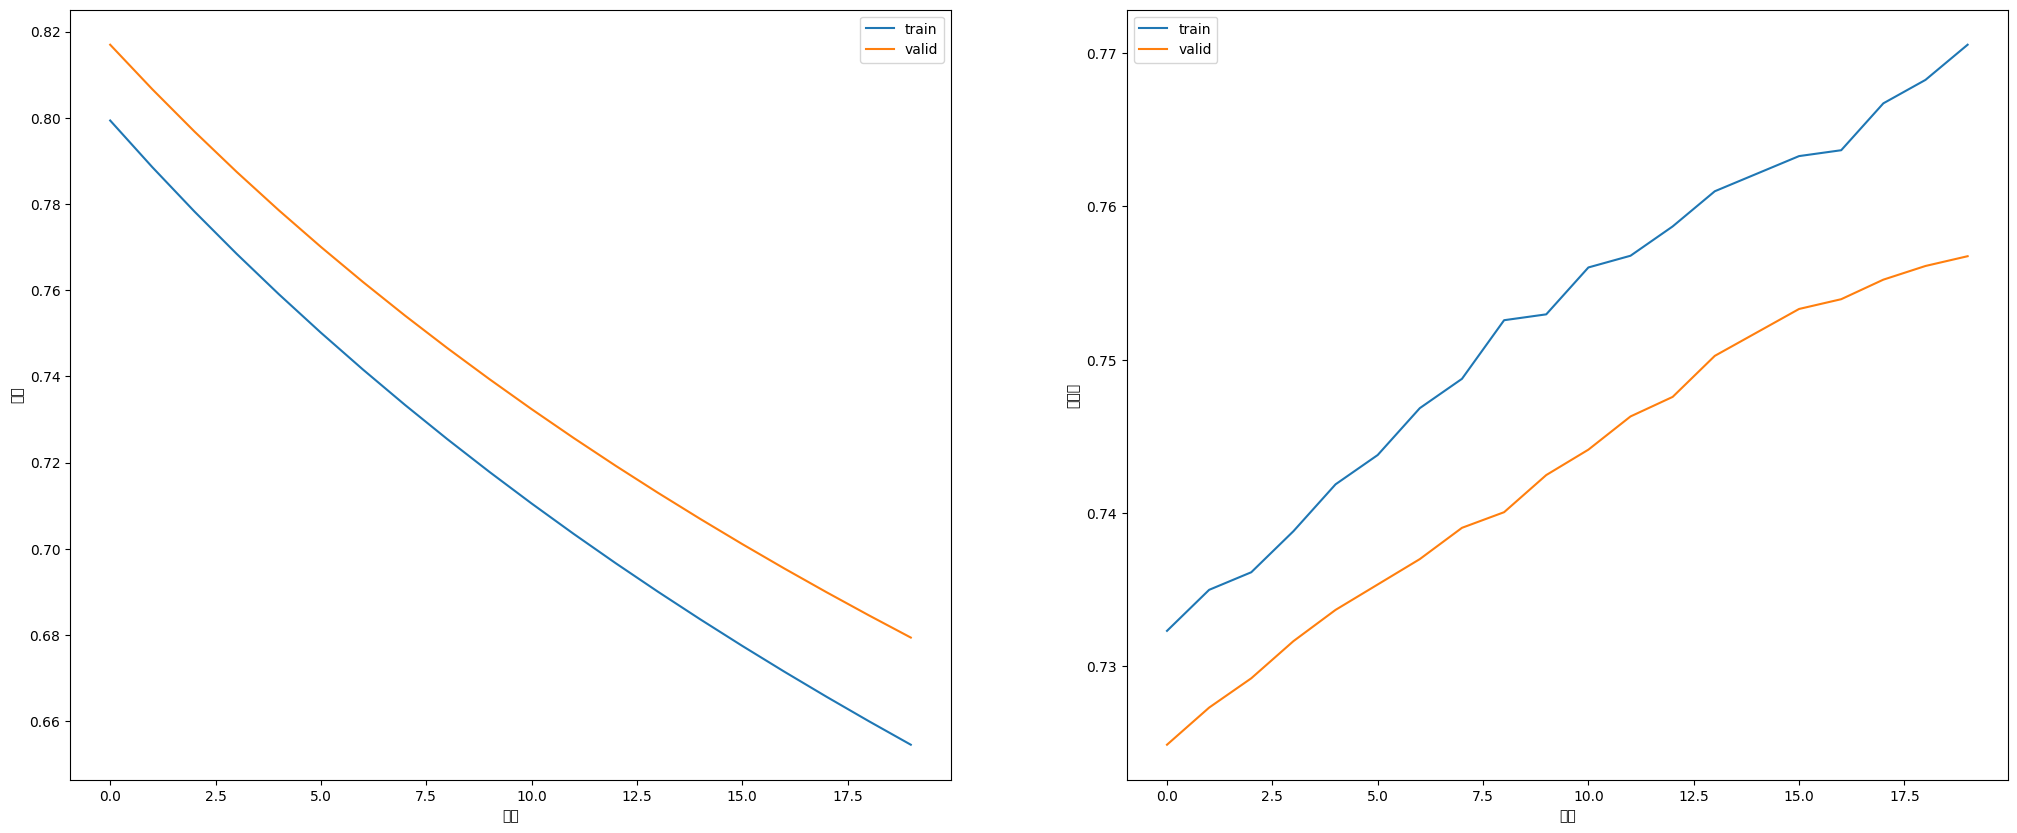

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(25, 10))
#loss_epoch
ax[0].plot(np.array(log_train).T[0], label='train')
ax[0].plot(np.array(log_valid).T[0], label='valid')
ax[0].set_xlabel('回数')
ax[0].set_ylabel('損失')
ax[0].legend()
#acc_epoch
ax[1].plot(np.array(log_train).T[1], label='train')
ax[1].plot(np.array(log_valid).T[1], label='valid')
ax[1].set_xlabel('回数')
ax[1].set_ylabel('正答率')
ax[1].legend()
plt.show()

In [31]:
# 参考https://yoshinashigoto-blog.herokuapp.com/detail/30/
# https://exture-ri.com/2021/01/04/pytorch-nn/
# https://yoshinashigoto-blog.herokuapp.com/detail/27/
# https://qiita.com/noknmgc/items/3b8531266e8986ca63fe
# https://qiita.com/awawaInu/items/e173acded17a142e6d02

# チェックポイント
## 問題75のコードを改変し，各エポックのパラメータ更新が完了するたびに，チェックポイント（学習途中のパラメータ（重み行列など）の値や最適化アルゴリズムの内部状態）をファイルに書き出せ．


In [32]:
#時間がかかるので少なめに設定する
log_train = []
log_valid = []

for epoch in range(20):
    model.train()
    for inputs, labels in dataloader_train:
        optimizer.zero_grad()#加算されてしまうのでリセット
        y_pred = model(inputs)#modelを用いて予測
        loss = criterion(y_pred, labels)#誤差
        loss.backward()#誤差修正
        optimizer.step()#更新

    # 正解率等の計算
    loss_train, acc_train = calc_loss_and_acc(model, criterion, dataloader_train)
    loss_valid, acc_valid = calc_loss_and_acc(model, criterion, dataloader_valid)
    log_train.append([loss_train, acc_train])
    log_valid.append([loss_valid, acc_valid])

    # チェックポイント new
    torch.save({'epoch' : epoch , 'model_state_dict' : model.state_dict() , 'optimizer_state_dict' : optimizer.state_dict()} , f'checkpoint{epoch + 1}.pt')

    # ログを出力
    print(f'epoch : {epoch + 1} , loss_train : {loss_train} , accuracy_train : {acc_train} , loss_valid : {loss_valid} , accuracy_valid: {acc_valid}')  

epoch : 1 , loss_train : 0.6491939483583229 , accuracy_train : 0.7724665391969407 , loss_valid : 0.6743477582931519 , accuracy_valid: 0.7576491585925548
epoch : 2 , loss_train : 0.6440076094081844 , accuracy_train : 0.777055449330784 , loss_valid : 0.6694462299346924 , accuracy_valid: 0.7596889342172362
epoch : 3 , loss_train : 0.6389575099125019 , accuracy_train : 0.7782026768642447 , loss_valid : 0.6646806597709656 , accuracy_valid: 0.7612187659357471
epoch : 4 , loss_train : 0.634038104805303 , accuracy_train : 0.7778202676864244 , loss_valid : 0.6600378751754761 , accuracy_valid: 0.7623661397246303
epoch : 5 , loss_train : 0.6292436484069845 , accuracy_train : 0.7789674952198853 , loss_valid : 0.6555132865905762 , accuracy_valid: 0.7637684854665987
epoch : 6 , loss_train : 0.624569898559644 , accuracy_train : 0.7789674952198853 , loss_valid : 0.6511045098304749 , accuracy_valid: 0.7647883732789393
epoch : 7 , loss_train : 0.6200116213437749 , accuracy_train : 0.7793499043977056 , l

# ミニバッチ化
## 問題76のコードを改変し，B事例ごとに損失・勾配を計算し，行列Wの値を更新せよ（ミニバッチ化）．Bの値を1,2,4,8,…と変化させながら，1エポックの学習に要する時間を比較せよ．

In [33]:
import time

def train_minibatch_model(dataset_train, dataset_valid, batch_size, model, criterion, optimizer, epochs):
    # dataloaderの作成
    dataloader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
    dataloader_valid = DataLoader(dataset_valid, batch_size=len(dataset_valid), shuffle=False)

    # 学習
    log_train = []
    log_valid = []
    for epoch in range(epochs):
        start = time.time()#計測開始
        model.train()

        for inputs, labels in dataloader_train:
            optimizer.zero_grad()#加算されてしまうのでリセット
            y_pred = model(inputs)#modelを用いて予測
            loss = criterion(y_pred, labels)#誤差
            loss.backward()#誤差修正
            optimizer.step()#更新

        # 正解率等の計算
        loss_train, acc_train = calc_loss_and_acc(model, criterion, dataloader_train)
        loss_valid, acc_valid = calc_loss_and_acc(model, criterion, dataloader_valid)
        log_train.append([loss_train, acc_train])
        log_valid.append([loss_valid, acc_valid])

        # # チェックポイント new
        # torch.save({'epoch' : epoch , 'model_state_dict' : model.state_dict() , 'optimizer_state_dict' : optimizer.state_dict()} , f'checkpoint{epoch + 1}.pt')

        end = time.time()#計測完了

        # ログを出力
        print(f'epoch : {epoch + 1} , loss_train : {loss_train} , accuracy_train : {acc_train} , loss_valid : {loss_valid} , accuracy_valid : {acc_valid} , {end - start} sec') 

    return {'train' : log_train , 'valid' : log_valid}

In [34]:
for batch_size in [2 ** i for i in range(5)]:
    print(f'バッチサイズ : {batch_size}')
    log = train_minibatch_model(dataset_train, dataset_valid, batch_size, model, criterion, optimizer, 1)

バッチサイズ : 1
epoch : 1 , loss_train : 0.5660146366569963 , accuracy_train : 0.7988527724665392 , loss_valid : 0.5959831476211548 , accuracy_valid : 0.7850586435492096 , 1.6474030017852783 sec
バッチサイズ : 2
epoch : 1 , loss_train : 0.5642901033105041 , accuracy_train : 0.7996175908221798 , loss_valid : 0.5944344997406006 , accuracy_valid : 0.785823559408465 , 1.1567189693450928 sec
バッチサイズ : 4
epoch : 1 , loss_train : 0.5633464680275444 , accuracy_train : 0.7996175908221798 , loss_valid : 0.5936666131019592 , accuracy_valid : 0.786460989291178 , 0.6675512790679932 sec
バッチサイズ : 8
epoch : 1 , loss_train : 0.5630675399112045 , accuracy_train : 0.7996175908221798 , loss_valid : 0.5932839512825012 , accuracy_valid : 0.7865884752677206 , 0.6296346187591553 sec
バッチサイズ : 16
epoch : 1 , loss_train : 0.5623965500513228 , accuracy_train : 0.7996175908221798 , loss_valid : 0.5930927395820618 , accuracy_valid : 0.7865884752677206 , 0.19746732711791992 sec


In [35]:
# 参考https://gotutiyan.hatenablog.com/entry/2020/04/21/182937
# https://tzmi.hatenablog.com/entry/2020/04/11/234417
# https://qiita.com/kimisyo/items/9508aff5a25e70772d5c

# GPU上での学習
## 問題77のコードを改変し，GPU上で学習を実行せよ．

In [36]:
def calc_loss_acc_gpu(model, criterion, loader, device):
    model.eval()
    loss = 0.0
    y_true = 0
    y_pred = 0

    with torch.no_grad():
        for inputs, labels in loader:

            inputs = inputs.to(device)#gpu
            labels = labels.to(device)#gpu

            outputs = model(inputs)
            loss += criterion(outputs, labels).item()#new
            pred = torch.argmax(outputs, dim=-1)
            y_true += len(inputs)
            y_pred += (pred == labels).sum().item()

    return loss / len(loader), y_pred / y_true

In [37]:
def train_minibatch_model(dataset_train, dataset_valid, batch_size, model, criterion, optimizer, epochs, device=None):
    model.to(device)#gpu
    # dataloaderの作成
    dataloader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
    dataloader_valid = DataLoader(dataset_valid, batch_size=len(dataset_valid), shuffle=False)

    # 学習
    log_train = []
    log_valid = []
    for epoch in range(epochs):
        start = time.time()#計測開始
        model.train()

        for inputs, labels in dataloader_train:
            optimizer.zero_grad()#加算されてしまうのでリセット

            inputs = inputs.to(device)#gpu
            labels = labels.to(device)#gpu

            y_pred = model(inputs)#modelを用いて予測
            loss = criterion(y_pred, labels)#誤差
            loss.backward()#誤差修正
            optimizer.step()#更新

        # 正解率等の計算
        loss_train, acc_train = calc_loss_acc_gpu(model, criterion, dataloader_train, device)#gpu
        loss_valid, acc_valid = calc_loss_acc_gpu(model, criterion, dataloader_valid, device)#gpu
        log_train.append([loss_train, acc_train])
        log_valid.append([loss_valid, acc_valid])

        # # チェックポイント new
        # torch.save({'epoch' : epoch , 'model_state_dict' : model.state_dict() , 'optimizer_state_dict' : optimizer.state_dict()} , f'checkpoint{epoch + 1}.pt')

        end = time.time()#計測完了

        # ログを出力
        print(f'epoch : {epoch + 1} , loss_train : {loss_train} , accuracy_train : {acc_train} , loss_valid : {loss_valid} , accuracy_valid : {acc_valid} , {end - start} sec') 

    return {'train' : log_train , 'valid' : log_valid}

In [38]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

for batch_size in [2 ** i for i in range(4)]:
    print(f'バッチサイズ : {batch_size}')
    log = train_minibatch_model(dataset_train, dataset_valid, batch_size, model, criterion, optimizer, 1, device=device)

cpu
バッチサイズ : 1
epoch : 1 , loss_train : 0.5597212689889771 , accuracy_train : 0.8 , loss_valid : 0.5900722742080688 , accuracy_valid : 0.7870984191738909 , 1.5024845600128174 sec
バッチサイズ : 2
epoch : 1 , loss_train : 0.557955740719773 , accuracy_train : 0.8011472275334608 , loss_valid : 0.5885841846466064 , accuracy_valid : 0.7874808771035187 , 1.1383705139160156 sec
バッチサイズ : 4
epoch : 1 , loss_train : 0.5571504784292265 , accuracy_train : 0.8015296367112811 , loss_valid : 0.5878457427024841 , accuracy_valid : 0.7876083630800612 , 0.4689054489135742 sec
バッチサイズ : 8
epoch : 1 , loss_train : 0.5568096703345623 , accuracy_train : 0.8015296367112811 , loss_valid : 0.5874777436256409 , accuracy_valid : 0.7877358490566038 , 0.28616809844970703 sec


In [ ]:
# 参考https://note.nkmk.me/python-pytorch-cuda-is-available-device-count/
# https://atmarkit.itmedia.co.jp/ait/articles/2008/28/news030.html

# 多層ニューラルネットワーク
## 問題78のコードを改変し，バイアス項の導入や多層化など，ニューラルネットワークの形状を変更しながら，高性能なカテゴリ分類器を構築せよ．

In [ ]:
# class model_ln_layers(nn.Module):
#     def __init__(self, input_size, hidden_size, output_size, num_layers):
#         super().__init__()
#         self.num_layers = num_layers
#         self.fc = nn.Linear(input_size, hidden_size)
#         self.fc_mid = nn.Linear(hidden_size, hidden_size)
#         self.fc_out = nn.Linear(hidden_size, output_size)
#         self.bn = nn.BatchNorm1d(hidden_size)

#     def forward(self, x):
#         x = F.relu(self.fc(x))
#         for _ in range(self.num_layers):
#             x = F.relu(self.bn(self.fc_mid(x)))
#         x = F.relu(self.fc_out(x))

#         return x

In [ ]:
# #時間がかかるので少なめに設定する
# model = model_ln_layers(300, 200, 4, 5)

# log = train_model(dataset_train, dataset_valid, 64, model, criterion, optimizer, 20, device)

In [39]:
class model_ln_layers(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.fc = nn.Linear(input_size, hidden_size)
        self.fc_mid_1 = nn.Linear(hidden_size, hidden_size)
        self.fc_mid_2 = nn.Linear(hidden_size, hidden_size)
        self.fc_mid_3 = nn.Linear(hidden_size, hidden_size)
        self.fc_out = nn.Linear(hidden_size, output_size)
        self.bn = nn.BatchNorm1d(hidden_size)

    def forward(self, x):
        x = F.relu(self.fc(x))
        x = F.relu(self.bn(self.fc_mid_1(x)))
        x = F.relu(self.bn(self.fc_mid_2(x)))
        x = F.relu(self.bn(self.fc_mid_3(x)))
        x = F.relu(self.fc_out(x))

        return x

In [41]:
model = model_ln_layers(300, 200, 4)

log = train_minibatch_model(dataset_train, dataset_valid, 64, model, criterion, optimizer, 20, device)

epoch : 1 , loss_train : 1.3793684563985684 , accuracy_train : 0.40038240917782025 , loss_valid : 1.3790150880813599 , accuracy_valid : 0.40642529321774606 , 0.7188246250152588 sec
epoch : 2 , loss_train : 1.3813758245328578 , accuracy_train : 0.39808795411089865 , loss_valid : 1.381044864654541 , accuracy_valid : 0.40629780724120346 , 0.335590124130249 sec
epoch : 3 , loss_train : 1.3825770325777007 , accuracy_train : 0.40458891013384324 , loss_valid : 1.3822271823883057 , accuracy_valid : 0.415859255481897 , 0.3139328956604004 sec
epoch : 4 , loss_train : 1.381401117255048 , accuracy_train : 0.39579349904397704 , loss_valid : 1.3810360431671143 , accuracy_valid : 0.4017083120856706 , 0.29052233695983887 sec
epoch : 5 , loss_train : 1.3796053136267312 , accuracy_train : 0.39694072657743784 , loss_valid : 1.3792458772659302 , accuracy_valid : 0.40247322794492607 , 0.610302209854126 sec
epoch : 6 , loss_train : 1.382832201515756 , accuracy_train : 0.39579349904397704 , loss_valid : 1.38

In [ ]:
# class Net(nn.Module):
#     def __init__(self, input_size, hidden_size, output_size):
#         super(Net, self).__init__()
#         self.fc1 = nn.Linear(input_size, hidden_size)
#         self.fc2 = nn.Linear(hidden_size, hidden_size)
#         self.fc3 = nn.Linear(hidden_size, hidden_size)
#         self.fc4 = nn.Linear(hidden_size, hidden_size)
#         self.fc5 = nn.Linear(hidden_size, hidden_size)
#         self.fc6 = nn.Linear(hidden_size, output_size)

         
#     def forward(self, x):
#         x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
#         x = F.relu(self.fc3(x))
#         x = F.relu(self.fc4(x))
#         x = F.relu(self.fc5(x))
#         x = self.fc6(x)
#         return F.log_softmax(x, dim=0)

In [ ]:
# input_size = 300
# output_size = 4
# hidden_size = 50
# num_epochs = 3#testのため回数少なめ
# learning_rate = 1e-3
# batch_size = 50

# criterion = nn.CrossEntropyLoss()
# op = optim.SGD(model.parameters(), lr = learning_rate)

# model = Net(input_size, hidden_size, output_size)
# log = train_model(dataset_train, dataset_valid, 64, model, CE, optimizer, 20, device)

In [ ]:
# 参考https://qiita.com/sudamasahiko/items/b54fed1ffe8bb6d48818
# https://atmarkit.itmedia.co.jp/ait/articles/2002/06/news025.html
# https://recruit.gmo.jp/engineer/jisedai/blog/pytorch_simplenn_to_gan/
# https://wonderfuru.com/scheduler/
# https://katsura-jp.hatenablog.com/entry/2019/01/30/183501